In [1]:
# Check whether tensorflow is installed

%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Import libraries
# os and numpy for general operations
# load_img and img_to_array for loading and converting images
# train_test_split from sklearn for splitting the dataset
# Sequential, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense from keras for building the model
# Adam for the optimizer
# EarlyStopping for early stopping

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define paths to the directories where the images are stored
peak_dir = 'D:\\testapi\\ml_testing\\peak_spectrogram'
non_peak_dir = 'D:\\testapi\\ml_testing\\non_peak_spectrogram'

# Images are loaded from the directories, converted to arrays, and added to a list
# Corresponding labels (1 for peak, 0 for non-peak) are added to another list

# Load images and assign labels
images = []
labels = []

# Load peak images
for image_file in os.listdir(peak_dir):
    image = load_img(os.path.join(peak_dir, image_file), color_mode='grayscale', target_size=(300, 300))
    image = img_to_array(image)
    images.append(image)
    labels.append(1)  # Assign label 1 to peak images

# Load non-peak images
for image_file in os.listdir(non_peak_dir):
    image = load_img(os.path.join(non_peak_dir, image_file), color_mode='grayscale', target_size=(300, 300))
    image = img_to_array(image)
    images.append(image)
    labels.append(0)  # Assign label 0 to non-peak images

# Convert lists to arrays
images = np.array(images)
labels = np.array(labels)

# Normalize images
# The pixel values are divided by 255 to scale them between 0 and 1
images = images / 255.0

# Split data into training and validation sets
# 80% of the data is used for training and 20% for validation
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define CNN model for binary image classification
model = Sequential()

# First conv block with 32 filters
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv block with 64 filters
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third conv block with 128 filters
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth conv block with 256 filters
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 3D outputs to 1D vector
model.add(Flatten())
# Dense layer with 512 neurons
model.add(Dense(512, activation='relu'))
# Output layer with 1 neuron (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile model with Adam optimizer
# The loss function is binary crossentropy and the metric is accuracy
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Define early stopping
# The training will stop if the validation loss does not improve after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train model with a specified batch size and early stopping
# The model is trained for 10 epochs
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64, callbacks=[early_stopping])

# Evaluate model on validation set
score = model.evaluate(x_val, y_val, verbose=0)

print('Test loss: Lower is better - ', score[0])
print('Test accuracy: Higher is better - ', score[1])

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 129s 6s/step - accuracy: 0.5185 - loss: 1.2899 - val_accuracy: 0.4907 - val_loss: 0.6339
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 127s 6s/step - accuracy: 0.6888 - loss: 0.5613 - val_accuracy: 0.8416 - val_loss: 0.3643
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.8818 - loss: 0.3076 - val_accuracy: 0.9255 - val_loss: 0.1974
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 129s 6s/step - accuracy: 0.9449 - loss: 0.1694 - val_accuracy: 0.9193 - val_loss: 0.1893
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 127s 6s/step - accuracy: 0.9445 - loss: 0.1753 - val_accuracy: 0.9410 - val_loss: 0.2472
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 128s 6s/step - accuracy: 0.9252 - loss: 0.1877 - val_accuracy: 0.9441 - val_loss: 0.1361
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 129s 6s/step - accuracy: 0.9488 - loss: 0.1552 - val_accuracy: 0.9534 - val_loss: 0.1417
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.9560 - loss: 0.1209 - val_accuracy: 0.9596 - v

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 485ms/step


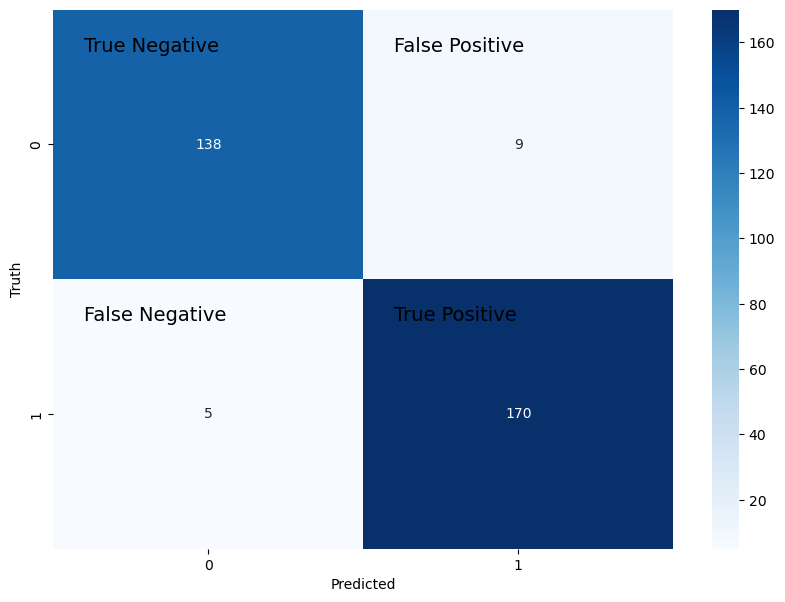

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred = (model.predict(x_val) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add labels to the plot
plt.text(0.1, 0.1, 'True Negative', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
plt.text(1.1, 0.1, 'False Positive', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
plt.text(0.1, 1.1, 'False Negative', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
plt.text(1.1, 1.1, 'True Positive', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')

plt.show()

In [11]:
from sklearn.metrics import classification_report

# Predict classes
y_pred = (model.predict(x_val) > 0.5).astype("int32")

# Generate classification report
# 'non-peak' corresponds to label 0 and 'peak' corresponds to label 1
report = classification_report(y_val, y_pred, target_names=['non-peak', 'peak'])

print(report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step
              precision    recall  f1-score   support

    non-peak       0.97      0.94      0.95       147
        peak       0.95      0.97      0.96       175

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



In [12]:
# Save the model for future use
model.save('my_trained_model.h5')